In [60]:
import tensorflow as tf
from tensorflow import keras

In [61]:
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


## Subclass API to build models

In [62]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [63]:
housing = fetch_california_housing()
X_train, X_test, Y_train, Y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [64]:
X_train_A, X_train_B = X_train[:,:5], X_train[:, :3]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:, :3]
X_test_A, X_test_B = X_test[:, :5], X_test[:, :3]

In [81]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        print(self.hidden1)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_op = keras.layers.Dense(1)
        self.aux_op = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_A)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_op= self.main_op(concat)
        aux_op = self.aux_op(hidden2)
        return main_op, aux_op

In [83]:
model = WideAndDeepModel()

In [86]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

Model: "wide_and_deep_model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            multiple                  180       
                                                                 
 dense_13 (Dense)            multiple                  930       
                                                                 
 dense_14 (Dense)            multiple                  36        
                                                                 
 dense_15 (Dense)            multiple                  31        
                                                                 
Total params: 1,177
Trainable params: 1,177
Non-trainable params: 0
_________________________________________________________________


In [85]:
history = model.fit((X_train_A, X_train_B), Y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), Y_valid))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 0.8922 - output_1_loss: 0.8051 - output_2_loss: 1.6769 - val_loss: 0.6641 - val_output_1_loss: 0.6518 - val_output_2_loss: 0.7751
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6424 - output_1_loss: 0.6350 - output_2_loss: 0.7090 - val_loss: 0.5984 - val_output_1_loss: 0.5902 - val_output_2_loss: 0.6720
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5921 - output_1_loss: 0.5857 - output_2_loss: 0.6497 - val_loss: 0.5789 - val_output_1_loss: 0.5715 - val_output_2_loss: 0.6458
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5713 - output_1_loss: 0.5653 - output_2_loss: 0.6246 - val_loss: 0.5665 - val_output_1_loss: 0.5600 - val_output_2_loss: 0.6253
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5577 - output_1_loss: 0.5521 - output_2_loss: 0.6081 - val_loss: 0.5592 - val_output_1_loss: 0.5533 - val_ou

In [87]:
model.summary()

Model: "wide_and_deep_model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            multiple                  180       
                                                                 
 dense_13 (Dense)            multiple                  930       
                                                                 
 dense_14 (Dense)            multiple                  36        
                                                                 
 dense_15 (Dense)            multiple                  31        
                                                                 
Total params: 1,177
Trainable params: 1,177
Non-trainable params: 0
_________________________________________________________________


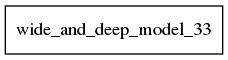

In [88]:
keras.utils.plot_model(model)